<a href="https://colab.research.google.com/github/peta-byte/colab/blob/master/Chapter_12_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
import pingouin as pg

In [3]:
# Question 2

n = 10 # male college students per group
a = 3 # different doses of caffeine
all_units = n * a

y_taps = np.array([[242,245,244,248,247,248,242,244,246,242], [248,246,245,247,248,250,247,246,243,244], [246,248,250,252,248,250,246,248,245,250]]) # taps per minute
taps_per_minute_df = pd.DataFrame(y_taps.T, columns=["0", "100", "200"])

print(y_taps.shape)
print(taps_per_minute_df)

(3, 10)
     0  100  200
0  242  248  246
1  245  246  248
2  244  245  250
3  248  247  252
4  247  248  248
5  248  250  250
6  242  247  246
7  244  246  248
8  246  243  245
9  242  244  250


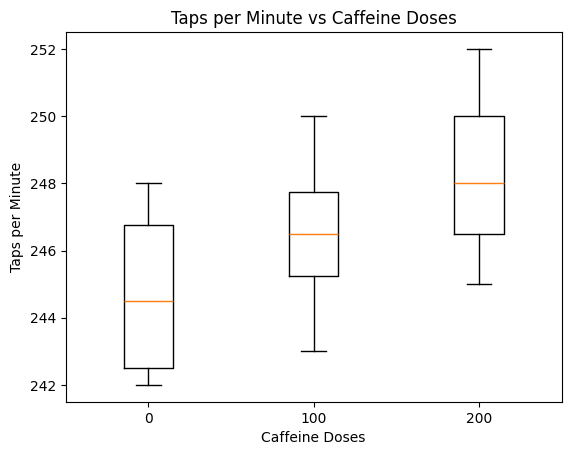

In [4]:
# a) Make side-by-side boxplots of the 3 groups. Do these plots indicate any obvious differences between the groups?

fig, ax = plt.subplots()
ax.boxplot(taps_per_minute_df, tick_labels=["0", "100", "200"])
plt.xlabel("Caffeine Doses")
plt.ylabel("Taps per Minute")
plt.title("Taps per Minute vs Caffeine Doses")
plt.show()

# These plots indicate that the group medians vary significantly with the 200 doses group having a higher median than the rest.

In [45]:
# b) Construct an ANOVA table and test whether there are significant differences in finger tapping between the students treated with different doses of caffeine.
alpha = 0.10

anova_table = stats.f_oneway(taps_per_minute_df["0"], taps_per_minute_df["100"], taps_per_minute_df["200"])

print(f"ANOVA F-statistic: {anova_table.statistic: .4f}")
print(f"ANOVA p-value: {anova_table.pvalue: .4f}")

if anova_table.pvalue < alpha:
    print("There are significant differences in finger tapping between the students treated with different doses of caffeine.")
else:
    print("There are no significant differences in finger tapping between the students treated with different doses of caffeine.")

ANOVA F-statistic:  6.1812
ANOVA p-value:  0.0062
There are significant differences in finger tapping between the students treated with different doses of caffeine.


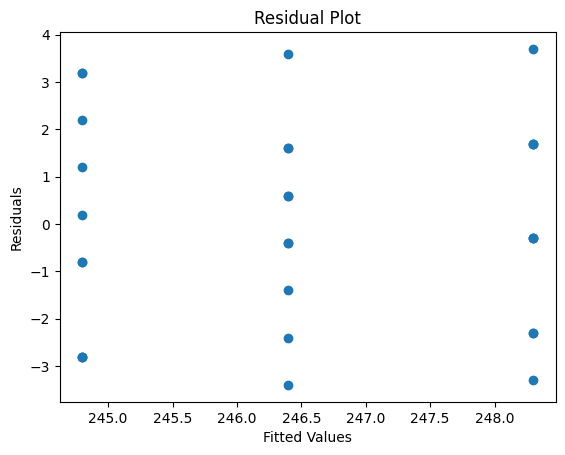

In [6]:
# c) Check the normality and constant variance assumptions by making residual plots.

data = pd.DataFrame({
    "doses": ["0"]*10 + ["100"]*10 + ["200"]*10,
    "taps": y_taps.flatten()
})

taps_detailed_anova_table = smf.ols('taps ~ C(doses)', data=data).fit()
residuals = taps_detailed_anova_table.resid

fig, ax = plt.subplots()
ax.scatter(taps_detailed_anova_table.fittedvalues, residuals)
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
ax.set_title("Residual Plot")
plt.show()

# The assumptions for normality and constant variance seem to be met. The data points appear to be
# randomly spread about zero with a fairly consistent difference between points.

In [7]:
# Question 4

a = 3 # different salinity sites

y_salinity_I = np.array([37.54,37.01,36.71,37.03,37.32,37.01,37.03,37.70,37.36,36.75,37.45,38.85])
y_salinity_II = np.array([40.17,40.80,39.76,39.70,40.79,40.44,39.79,39.38, np.nan, np.nan, np.nan, np.nan])
y_salinity_III = np.array([39.04,39.21,39.05,38.24,38.53,38.71,38.89,38.66,38.51,40.08, np.nan, np.nan])

y_salinity_II = np.nan_to_num(y_salinity_II, nan=np.nanmean(y_salinity_II))
y_salinity_III = np.nan_to_num(y_salinity_III, nan=np.nanmean(y_salinity_III))

y_salinity = np.array([y_salinity_I, y_salinity_II, y_salinity_III])

site_salinity_df = pd.DataFrame(y_salinity.T, columns=["Site I", "Site II", "Site III"])

print(y_salinity_I.shape, y_salinity_II.shape, y_salinity_III.shape)
print(site_salinity_df)

(12,) (12,) (12,)
    Site I   Site II  Site III
0    37.54  40.17000    39.040
1    37.01  40.80000    39.210
2    36.71  39.76000    39.050
3    37.03  39.70000    38.240
4    37.32  40.79000    38.530
5    37.01  40.44000    38.710
6    37.03  39.79000    38.890
7    37.70  39.38000    38.660
8    37.36  40.10375    38.510
9    36.75  40.10375    40.080
10   37.45  40.10375    38.892
11   38.85  40.10375    38.892


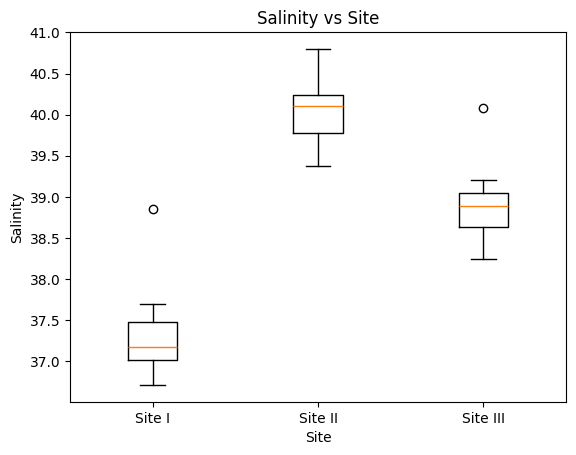

In [8]:
# a) Make side-by-side boxplots of the 3 groups. Do these plots indicate any obvious differences between the groups?

fig, ax = plt.subplots()
ax.boxplot(site_salinity_df, tick_labels=["Site I", "Site II", "Site III"])
plt.xlabel("Site")
plt.ylabel("Salinity")
plt.title("Salinity vs Site")
plt.show()

# These plots indicate that the group medians vary significantly with the site II group having a higher median than the rest.

In [46]:
# b) Construct an ANOVA table and test whether there are significant differences in salinity at the different sites.
alpha = 0.01

site_salinity_df = pd.DataFrame({
    "sites": ["Site I"]*12 + ["Site II"]*12 + ["Site III"]*12,
    "salinity": y_salinity_I.tolist() + y_salinity_II.tolist() + y_salinity_III.tolist()
})

anova_table = stats.f_oneway(y_salinity_I, y_salinity_II, y_salinity_III)

print(f"ANOVA F-statistic: {anova_table.statistic: .4f}")
print(f"ANOVA p-value: {anova_table.pvalue: .4f}")

if anova_table.pvalue < alpha:
    print("There are significant differences in site salinity.")
else:
    print("There are no significant differences in site salinity.")

ANOVA F-statistic:  97.7184
ANOVA p-value:  0.0000
There are significant differences in site salinity.


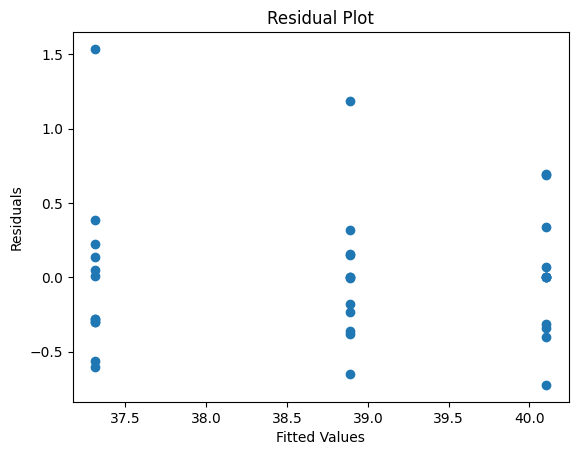

In [10]:
# c) Check the normality and constant variance assumptions by making residual plots.

salinity_detailed_anova_table = smf.ols('salinity ~ C(sites)', data=site_salinity_df).fit()

plt.scatter(salinity_detailed_anova_table.fittedvalues, salinity_detailed_anova_table.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# The assumptions for normality and constant variance seem to be met. Aside from the apparent outliers, the data points appear to be
# randomly spread about zero with a fairly consistent difference between points. There appears to be some clustering of
# residuals but this could be caused by the filled in values to give all data arrays the same length.

In [47]:
# Question 12

# Compare caffeine taps of 100mg dose and 200mg dose groups using Dunnett's method.

alpha = 0.10

data = pd.DataFrame({
    "doses": ["0"]*10 + ["100"]*10 + ["200"]*10,
    "taps": y_taps.flatten()
})

# Perform Dunnett's test (compare treatments to control)
dunnett_results = pg.pairwise_tests(dv="taps", between="doses", data=data, padjust="holm")

# Filter only comparisons against the control group
control_group = "0"
dunnett_results = dunnett_results[dunnett_results["A"] == control_group]

print(dunnett_results)

for i, result in enumerate(dunnett_results.itertuples(), start=1):
    if result._10 < alpha: # corrected p-value
      print(result.B, "is significantly different from", control_group)
    else:
      print(result.B, "is not significantly different from", control_group)

  Contrast  A    B  Paired  Parametric         T   dof alternative     p-unc  \
0    doses  0  100   False        True -1.600000  18.0   two-sided  0.127003   
1    doses  0  200   False        True -3.394168  18.0   two-sided  0.003233   

     p-corr p-adjust    BF10    hedges  
0  0.127003     holm   0.949 -0.685308  
1  0.009699     holm  12.031 -1.453781  
100 is not significantly different from 0
200 is significantly different from 0


In [12]:
# Question 21

methods_df = pd.DataFrame({
    "A": [89,84,81,87,79],
    "B": [88,77,87,92,81],
    "C": [97,92,87,89,80],
    "D": [94,79,85,84,88]
})

methods_df.index = methods_df.index + 1

blends_df = methods_df.T



print(methods_df)
print(blends_df)

    A   B   C   D
1  89  88  97  94
2  84  77  92  79
3  81  87  87  85
4  87  92  89  84
5  79  81  80  88
    1   2   3   4   5
A  89  84  81  87  79
B  88  77  87  92  81
C  97  92  87  89  80
D  94  79  85  84  88


In [33]:
# a) Estimate the method effects and blend effects

from statsmodels.stats.multicomp import MultiComparison

methods = pd.DataFrame({
    "methods": ["A"]*5 + ["B"]*5 + ["C"]*5 + ["D"]*5,
    "values": methods_df.values.flatten()
})

blends = pd.DataFrame({
    "blends": ["1"]*4 + ["2"]*4 + ["3"]*4 + ["4"]*4 + ["5"]*4,
    "values": blends_df.values.flatten()
})

# method effects
methods_comp = pg.pairwise_gameshowell(dv='values', between='methods', data=methods).round(3)

print(methods_comp)

# blend effects
blends_comp = pg.pairwise_gameshowell(dv='values', between='blends', data=blends).round(3)

print(blends_comp)

# When method A group is compared against other method groups, A and C, it has a significantly greater mean difference.
# When blend 3 block is compared against other blocks (1, 2, 5), it has a significantly greater mean difference.

   A  B  mean(A)  mean(B)  diff     se      T     df   pval  hedges
0  A  B     90.4     83.2   7.2  3.592  2.005  7.737  0.265   1.145
1  A  C     90.4     88.0   2.4  2.581  0.930  5.988  0.791   0.531
2  A  D     90.4     82.4   8.0  2.814  2.843  7.222  0.090   1.624
3  B  C     83.2     88.0  -4.8  3.007 -1.596  5.418  0.451  -0.912
4  B  D     83.2     82.4   0.8  3.209  0.249  6.484  0.994   0.142
5  C  D     88.0     82.4   5.6  2.015  2.779  7.297  0.097   1.588
   A  B  mean(A)  mean(B)  diff     se      T     df   pval  hedges
0  1  2    85.25    82.75  2.50  3.285  0.761  5.055  0.932   0.468
1  1  3    85.25    90.50 -5.25  3.805 -1.380  4.501  0.665  -0.848
2  1  4    85.25    87.50 -2.25  3.388 -0.664  4.928  0.956  -0.408
3  1  5    85.25    84.00  1.25  2.562  0.488  5.973  0.986   0.300
4  2  3    82.75    90.50 -7.75  4.376 -1.771  5.785  0.465  -1.089
5  2  4    82.75    87.50 -4.75  4.018 -1.182  5.989  0.762  -0.727
6  2  5    82.75    84.00 -1.25  3.351 -0.373  5

In [50]:
# b) Construct an ANOVA table.

alpha = 0.10

# Are there significant differences between the methods?

methods_detailed_anova_table = smf.ols('values ~ C(methods)', data=methods).fit()

print(f"Methods ANOVA F-statistic: {methods_detailed_anova_table.fvalue: .4f}")
print(f"Methods ANOVA p-value: {methods_detailed_anova_table.f_pvalue: .4f}")

if methods_detailed_anova_table.f_pvalue < alpha:
    print("There are significant differences between the methods.")
else:
    print("There are no significant differences between the methods.")


# Are there significant differences betweent the blends?

blends_detailed_anova_table = smf.ols('values ~ C(blends)', data=blends).fit()

print(f"Blends ANOVA F-statistic: {blends_detailed_anova_table.fvalue: .4f}")
print(f"Blends ANOVA p-value: {blends_detailed_anova_table.f_pvalue: .4f}")

if blends_detailed_anova_table.f_pvalue < alpha:
    print("There are significant differences between the blends.")
else:
    print("There are no significant differences between the blends.")


Methods ANOVA F-statistic:  3.4717
Methods ANOVA p-value:  0.0410
There are significant differences between the methods.
Blends ANOVA F-statistic:  1.3782
Blends ANOVA p-value:  0.2883
There are no significant differences between the blends.


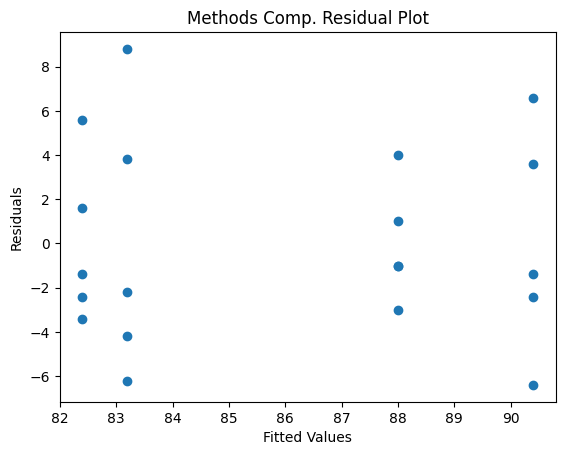

In [15]:
# c) Check the normality and constant variance assumptions by making residual plots

plt.scatter(methods_detailed_anova_table.fittedvalues, methods_detailed_anova_table.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Methods Comp. Residual Plot")
plt.show()

# The assumptions for normality and constant variance seem to be met. Aside from the apparent outliers, the data points appear to be
# randomly spread about zero with a fairly consistent difference between points.

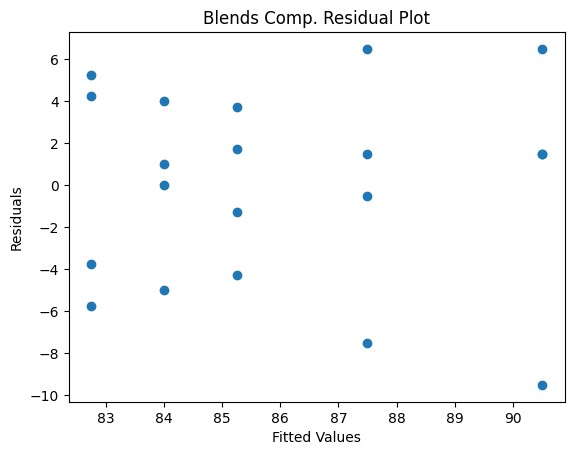

In [16]:
plt.scatter(blends_detailed_anova_table.fittedvalues, blends_detailed_anova_table.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Blends Comp. Residual Plot")
plt.show()

# The assumptions for normality and constant variance seem to be met. Aside from the apparent outliers, the data points appear to be
# randomly spread about zero with a fairly consistent difference between points.

In [17]:
# Question 22

stadiums_df = pd.DataFrame({
    "home_dome": [0.797,0.769,0.834,0.780,0.829,0.795],
    "other_domes": [0.789,0.767,0.848,0.774,0.826,0.808],
    "outdoors": [0.789,0.777,0.867,0.793,0.856,0.848]
})

stadiums_df.index = ["Alex Cole", "Pedro Munoz", "Marty Cordova", "Kirby Puckett", "Shane Mack", "Rich Becker"]


print(stadiums_df)

               home_dome  other_domes  outdoors
Alex Cole          0.797        0.789     0.789
Pedro Munoz        0.769        0.767     0.777
Marty Cordova      0.834        0.848     0.867
Kirby Puckett      0.780        0.774     0.793
Shane Mack         0.829        0.826     0.856
Rich Becker        0.795        0.808     0.848


In [18]:
# a) Construct an ANOVA table. Are there significant differences between stadiums at the 0.05 level.

alpha = 0.05

stadiums = pd.DataFrame({
    "stadiums": ["home_dome"]*6 + ["other_domes"]*6 + ["outdoors"]*6,
    "values": stadiums_df.values.flatten()
})


# Are there significant differences between the stadiums?

stadiums_detailed_anova_table = smf.ols('values ~ C(stadiums)', data=stadiums).fit()

print(f"Stadiums ANOVA F-statistic: {stadiums_detailed_anova_table.fvalue: .4f}")
print(f"Stadiums ANOVA p-value: {stadiums_detailed_anova_table.f_pvalue: .4f}")

if stadiums_detailed_anova_table.f_pvalue < alpha:
    print("Reject the null hypothesis. There are significant differences between the stadiums.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the stadiums.")

Stadiums ANOVA F-statistic:  4.6691
Stadiums ANOVA p-value:  0.0265
Reject the null hypothesis. There are significant differences between the stadiums.


In [44]:
# b) Use Tukey's method to identify the differences in zone ratings among the 3 types of stadiums.

alpha = 0.05

stadiums_comp = pg.pairwise_gameshowell(dv='values', between='stadiums', data=stadiums).round(3)

print(stadiums_comp)

for i, val in enumerate(stadiums_comp.itertuples(), start=1):
    if val.pval < alpha:
      print(val.B, "is significantly different from", val.A)
    else:
      print(val.B, "is not significantly different from", val.A)

             A            B  mean(A)  mean(B)   diff     se      T     df  \
0    home_dome  other_domes    0.781    0.816 -0.035  0.017 -2.087  5.971   
1    home_dome     outdoors    0.781    0.827 -0.046  0.011 -4.283  7.570   
2  other_domes     outdoors    0.816    0.827 -0.011  0.018 -0.596  8.149   

    pval  hedges  
0  0.173  -1.112  
1  0.008  -2.282  
2  0.826  -0.318  
other_domes is not significantly different from home_dome
outdoors is significantly different from home_dome
outdoors is not significantly different from other_domes


In [20]:
# Question 24

trees_df = pd.DataFrame({
    "N": [72,60,56,41,32,30,39,42,37,33,32,63,54,47,91,56,79,81,78,46,39,32,60,35,39,50,43,48],
    "E": [66,53,57,29,32,35,39,43,40,29,30,45,46,51,79,68,65,80,55,38,35,30,50,37,36,34,37,54],
    "S": [76,66,64,36,35,34,31,31,31,27,34,74,60,52,100,47,70,68,67,37,34,30,67,48,39,37,39,57],
    "W": [77,63,58,38,36,26,27,25,25,36,28,63,52,43,75,50,61,58,60,38,37,32,54,39,31,40,50,43]
})

trees_df.index = trees_df.index + 1

print(trees_df)

     N   E    S   W
1   72  66   76  77
2   60  53   66  63
3   56  57   64  58
4   41  29   36  38
5   32  32   35  36
6   30  35   34  26
7   39  39   31  27
8   42  43   31  25
9   37  40   31  25
10  33  29   27  36
11  32  30   34  28
12  63  45   74  63
13  54  46   60  52
14  47  51   52  43
15  91  79  100  75
16  56  68   47  50
17  79  65   70  61
18  81  80   68  58
19  78  55   67  60
20  46  38   37  38
21  39  35   34  37
22  32  30   30  32
23  60  50   67  54
24  35  37   48  39
25  39  36   39  31
26  50  34   37  40
27  43  37   39  50
28  48  54   57  43


In [32]:
# a) Estimate direction effects.

trees = pd.DataFrame({
    "trees": ["N"]*28 + ["E"]*28 + ["S"]*28 + ["W"]*28,
    "values": trees_df.values.flatten()
})

trees_comp = pg.pairwise_gameshowell(dv='values', between='trees', data=trees).round(3)

print(trees_comp)


# When S group is compared against other directions groups, it has a significantly greater mean difference.

   A  B  mean(A)  mean(B)    diff     se      T      df   pval  hedges
0  E  N   41.893   46.714  -4.821  3.953 -1.220  51.373  0.617  -0.321
1  E  S   41.893   60.429 -18.536  4.275 -4.335  48.448  0.000  -1.143
2  E  W   41.893   42.536  -0.643  3.078 -0.209  50.176  0.997  -0.055
3  N  S   46.714   60.429 -13.714  4.670 -2.936  53.212  0.025  -0.774
4  N  W   46.714   42.536   4.179  3.607  1.159  44.138  0.656   0.305
5  S  W   60.429   42.536  17.893  3.958  4.521  41.036  0.000   1.191


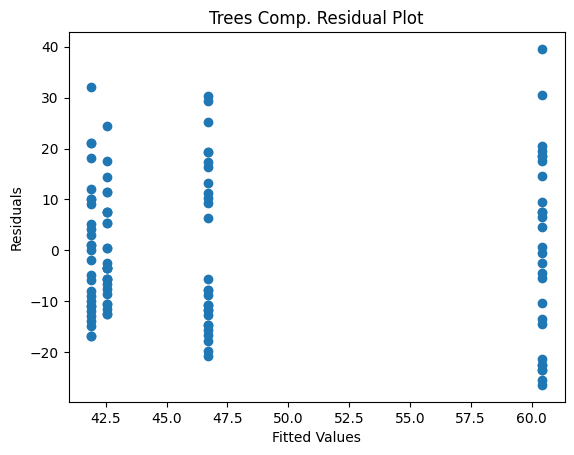

In [30]:
# c) Check for normality and constant variance assumptions by making residual plots.

plt.scatter(trees_detailed_anova_table.fittedvalues, trees_detailed_anova_table.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Trees Comp. Residual Plot")
plt.show()


# The assumptions for normality and constant variance seem to be met. The data points appear to be
# randomly spread about zero with a fairly consistent difference between points.

In [24]:
# Question 26

plasma_conc_df = pd.DataFrame({
    "8": [93,116,125,144,105,109,89,116,151,137], # time 8 am
    "11": [121,135,137,173,119,83,95,128,149,139],
    "14": [112,114,119,148,125,109,88,122,141,125],
    "17": [117,98,105,124,91,80,91,107,126,109],
    "20": [121,135,102,122,133,104,116,119,138,107] # time 8 pm
})

plasma_conc_df.index = plasma_conc_df.index + 1

print(plasma_conc_df)


      8   11   14   17   20
1    93  121  112  117  121
2   116  135  114   98  135
3   125  137  119  105  102
4   144  173  148  124  122
5   105  119  125   91  133
6   109   83  109   80  104
7    89   95   88   91  116
8   116  128  122  107  119
9   151  149  141  126  138
10  137  139  125  109  107


Text(0.5, 1.0, 'Plasma Concentration Over Time')

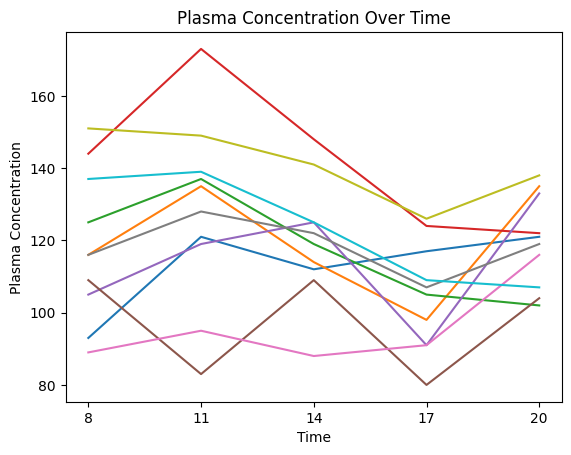

In [25]:
# a) Plot plasma levels over time for each person. Are there any times at which plasma levels tend to be higher or lower?

fig, ax = plt.subplots()
ax.plot(plasma_conc_df.T)
plt.xlabel("Time")
plt.ylabel("Plasma Concentration")
plt.title("Plasma Concentration Over Time")

# Plasma levels tend to be higher at 11am and lower at 5pm.

In [49]:
# b) Construct an ANOVA table. Are there significant differences between times?

alpha = 0.05

plasma_conc = pd.DataFrame({
    "time": ["8"]*10 + ["11"]*10 + ["14"]*10 + ["17"]*10 + ["20"]*10,
    "values": plasma_conc_df.values.flatten()
})


# Are there significant differences between the times?

plasma_conc_detailed_anova_table = smf.ols('values ~ C(time)', data=plasma_conc).fit()

print(f"Plasma Concentration ANOVA F-statistic: {plasma_conc_detailed_anova_table.fvalue: .4f}")
print(f"Plasma Concentration ANOVA p-value: {plasma_conc_detailed_anova_table.f_pvalue: .4f}")

if plasma_conc_detailed_anova_table.f_pvalue < alpha:
    print("There are significant differences between the times.")
else:
    print("There are no significant differences between the times.")


Plasma Concentration ANOVA F-statistic:  5.4954
Plasma Concentration ANOVA p-value:  0.0011
There are significant differences between the times.


In [48]:
# c) Use the Tukey method to determine which sampling times are significantly different from each other.

alpha = 0.05

plasma_conc_comp = MultiComparison(plasma_conc_df.T.values, plasma_conc_df.columns.tolist())
plasma_comp_results = plasma_conc_comp.tukeyhsd()

print(plasma_comp_results)

if plasma_comp_results.reject[0]:
    print("There are significant differences between the times.")
else:
    print("There are no significant differences between the times.")


/usr/local/lib/python3.11/dist-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
    11     14     -5.0   0.0  -5.0  -5.0   True
    11     17    -24.0   0.0 -24.0 -24.0   True
    11     20      4.0   0.0   4.0   4.0   True
    14     17    -19.0   0.0 -19.0 -19.0   True
    14     20      9.0   0.0   9.0   9.0   True
    17     20     28.0   0.0  28.0  28.0   True
-----------------------------------------------
There are significant differences between the times.
